# WSI 2022L
# Laboratorium 1 i 2
# Michał Brus, 299106

# Importy:

In [81]:
import numpy as np
import autograd as ag
import math
import matplotlib.pyplot as plt

# F1:

In [82]:
def f1(x):
    return x ** 4

# Gradient F1:

In [83]:
def grad_f1(x):
    return 4 * x ** 3

# F2:

In [84]:
def f2(x):
    e = math.e
    return 1.5 - (e ** (-x[0] ** 2 - x[1] ** 2)) - 0.5 * (e ** (-(x[0] - 1) ** 2 - (x[1] + 2) ** 2))

# Gradient F2:

In [85]:
def grad_f2(x):
    x1 = x[0]
    x2 = x[1]
    return np.array([2 * x1 * np.exp(-x1 ** 2 - x2 ** 2) + (x1 - 1) * np.exp(-(x1 - 1) ** 2 - (x2 + 2) ** 2),
                     2 * x2 * np.exp(-x1 ** 2 - x2 ** 2) + (x2 + 2) * np.exp(-(x1 - 1) ** 2 - (x2 + 2) ** 2)
                     ])

# Algorytm najszybszego spadku (gradient prosty):

In [86]:
def gradient_descent(function, dimensions, max_x, max_iter, learn_rate=0.001):
    grad_f = ag.grad(function)
    x = np.random.uniform(-max_x, max_x, dimensions)
    points_history = np.array([x])
    for _ in range(max_iter - 1):
        diff = grad_f(x)
        x = x - learn_rate * diff
        x[x < -max_x] = -max_x
        x[x > max_x] = max_x
        points_history = np.append(points_history, [x], axis=0)

    optimum = np.array([x, function(x)])
    return optimum, points_history

Ta implementacja funkcji gradientu przyjmuje na wejści funkcję, której gradient będzie liczony wewnątrz (pakiet autograd), jej wymiar, aby wylosować odpowiednio wymiarowy wektor, maksymalną wartość jaką mogą osiągnąć współrzędne, aby uniknąć nieskończonych wartości i niepożądanych konsekwencji (np. buffer overflow), maksymalną liczbę iteracji, która jest tu kończy pracę algorytmu (chociaż można przyjąć różne wersje np. gdzie algorytm zatrzymuje się, gdy zbliży się wystarczająco blisko minimum) oraz learn_rate, inaczej paramter Beta, czyli rozmiar kroku.

# Funkcja f1(x) = x^4

Eksperymenty przeprowadzono dla max_x = 5, max_iter = 200 dla 6 losowych punktów początkowych ze zmiennym learn_rate.

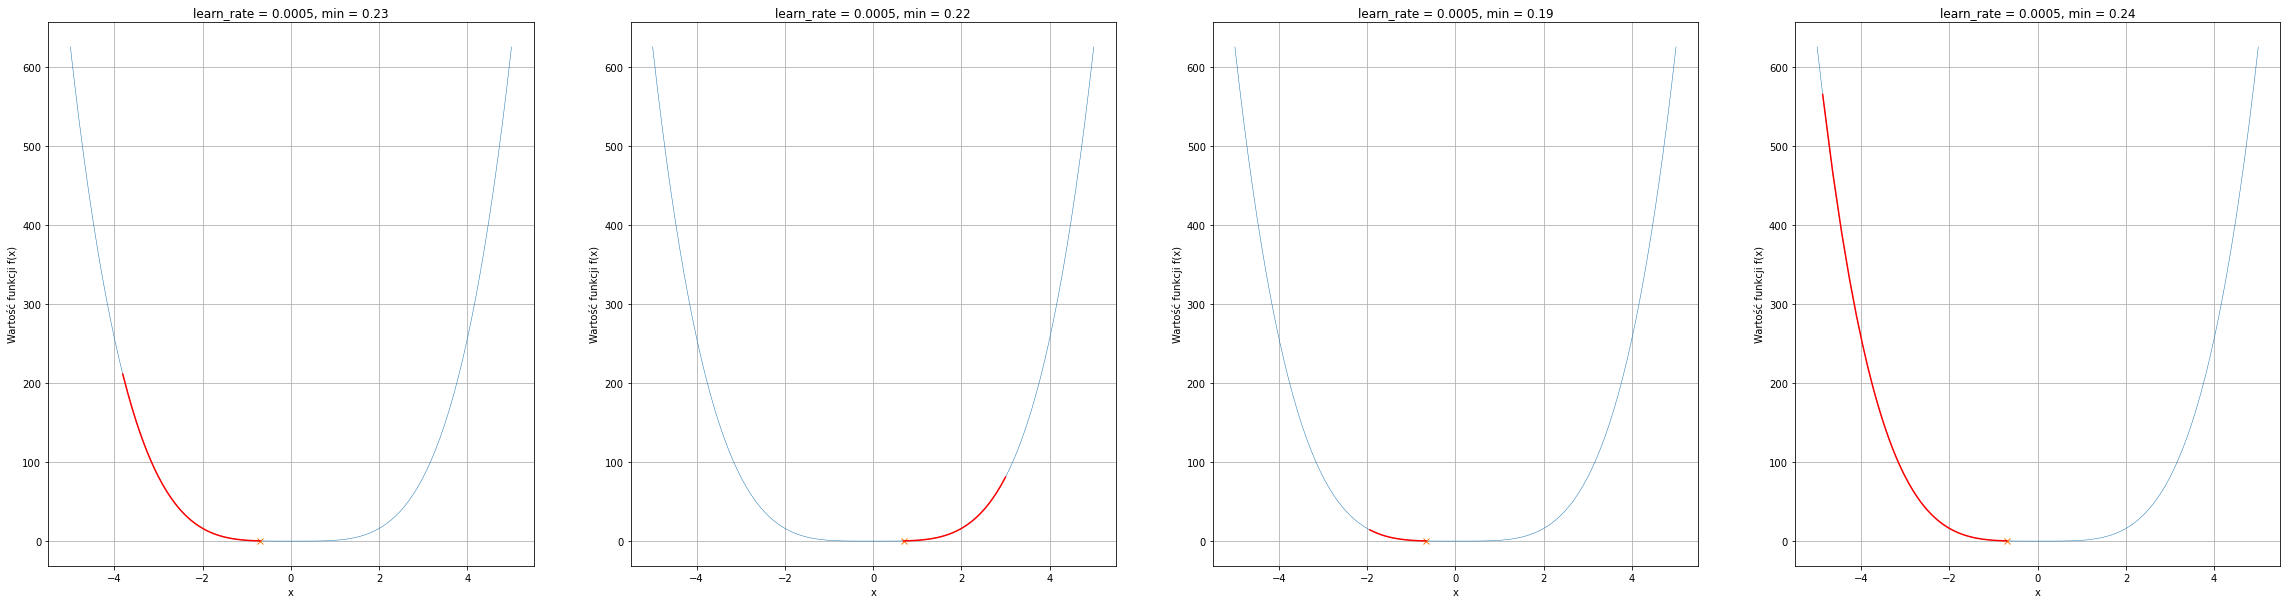

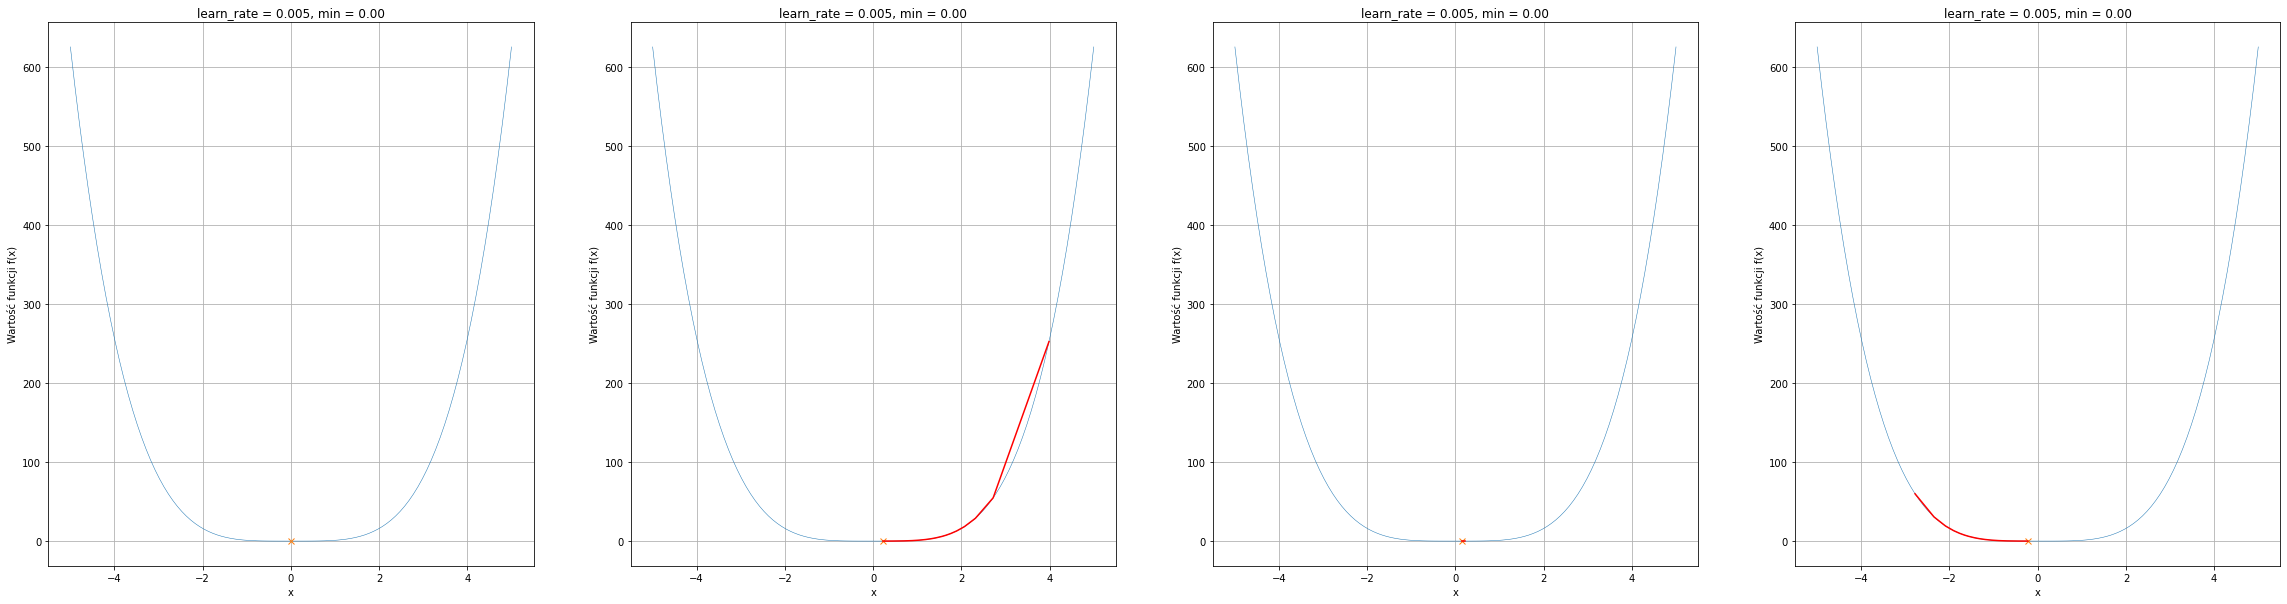

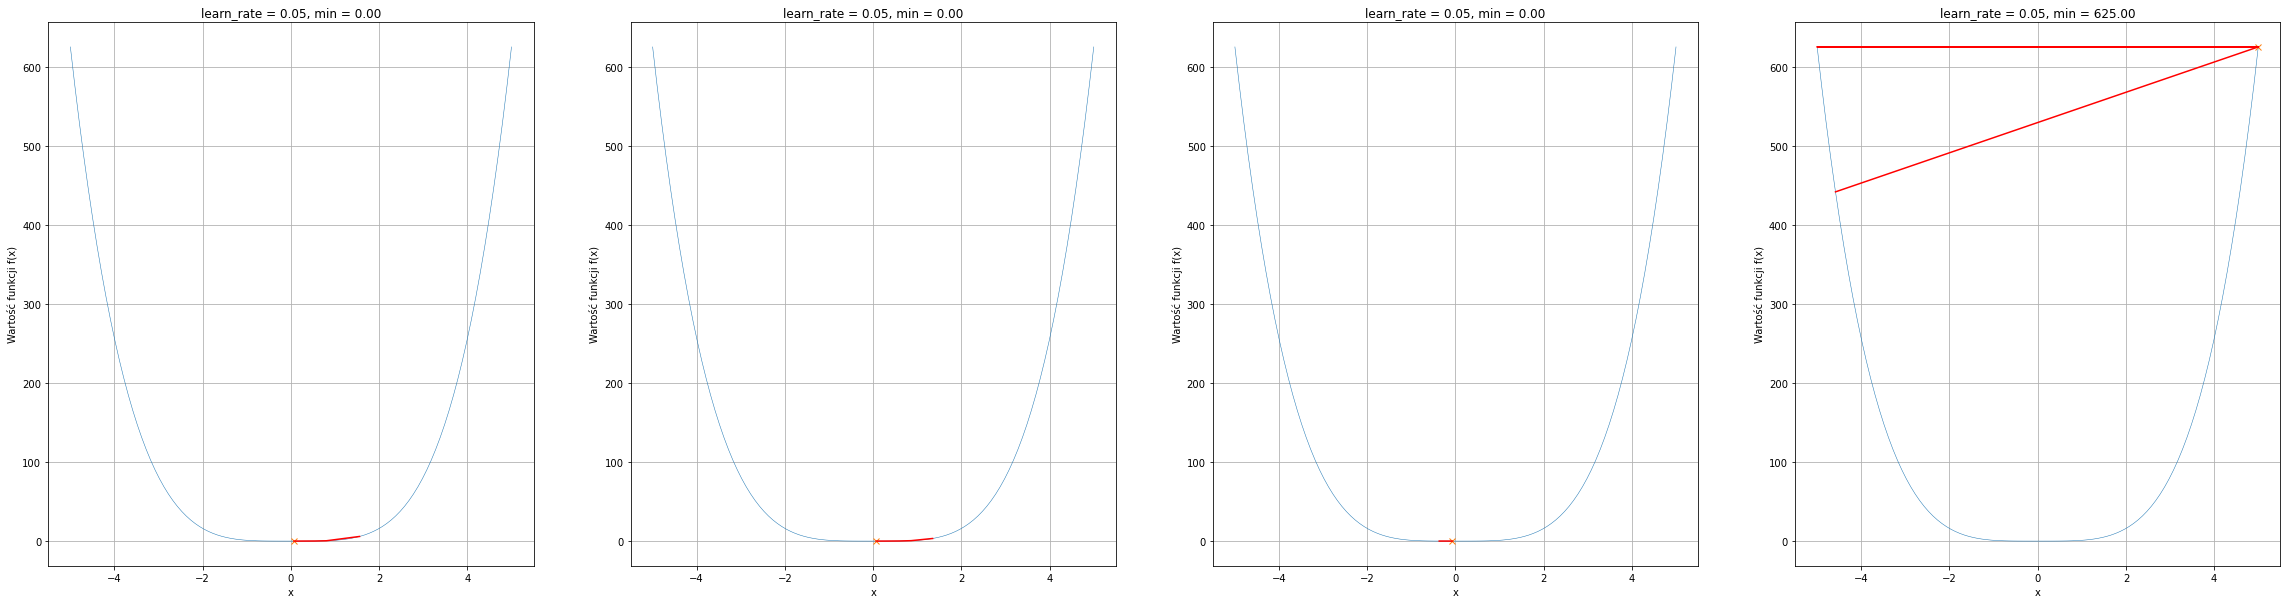

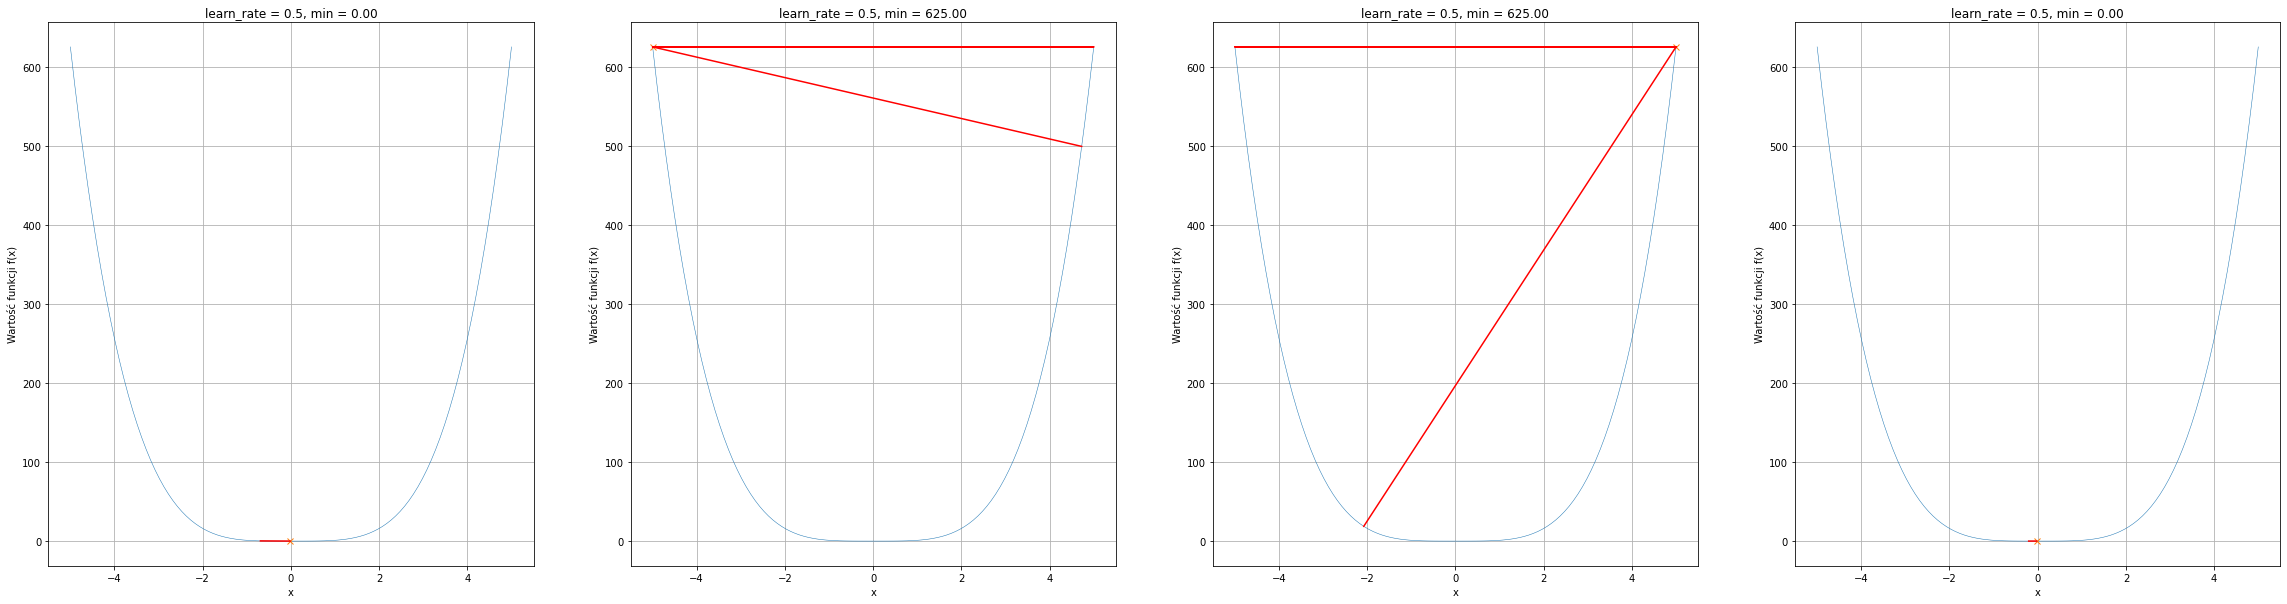

In [87]:
learn_rates = np.array([0.0005, 0.005, 0.05, 0.5])
max_x = 5
max_iter = 500
func = f1
x = np.linspace(-max_x, max_x, 100)
for j in range(len(learn_rates)):
    plt.figure(figsize=(40, 10))
    for i in range(4):
        minimum, steps = gradient_descent(func, 1, max_x, max_iter, learn_rates[j])
        plt.subplot(1, 4, i+1)
        plt.plot(x, func(x), linewidth=0.5)
        plt.plot(minimum[0], minimum[1], 'x')
        plt.plot(steps, func(steps), color='red')
        plt.title(f"learn_rate = {learn_rates[j]}, min = {minimum[1][0]:.2f}")
        plt.xlabel("x")
        plt.ylabel("Wartość funkcji f(x)")
        plt.grid(b=True)
    plt.show()


# Wnioski i obserwacje

Analizując wykresy dla poszczególnych Beta (tj. learn_rate) możemy zauważyć następujące zjawiska. Po pierwsze dla małych wartość Beta widać, że w części przypadków nie osiągniemy minimum funkcji, ponieważ poszczególne skoki są mocno ograniczone przez parametr Beta. Zwięszenie liczby iteracji może lekko pomóc w tej sytuacji, ale nadal istnieje ryzyko utknięcia w miejscu oddalonym od optimum lokalnego (patrz learn_rate=0.0005). Wraz ze wzrostem parametru Beta, rośnie też "mobilność", tj. zwiększa się szanasa na większe skoki, a tym samym zwiększa się prawdopodobieństwo trafienia w okolice minimum lokalnego (patrz learn_rate=0.005). Natomiast dla zbyt dużych wartości Bety można zobaczyć "przeskakiwanie". Beta jest tak duża, że wpływa negatywnie na możliwość zbliżenia się do potencjalnego minimum i omija je (patrz learn_rate=0.5). Gdyby nie ograniczenia nadane na dziedzinę funkcji, istniałoby również ryzyko coraz większych odchyleń (potencjalnie nieskończonych), co udało mi się zaobserwować podczas testowania różnych parametrów.

# Funkcja dwuwymiarowa f2

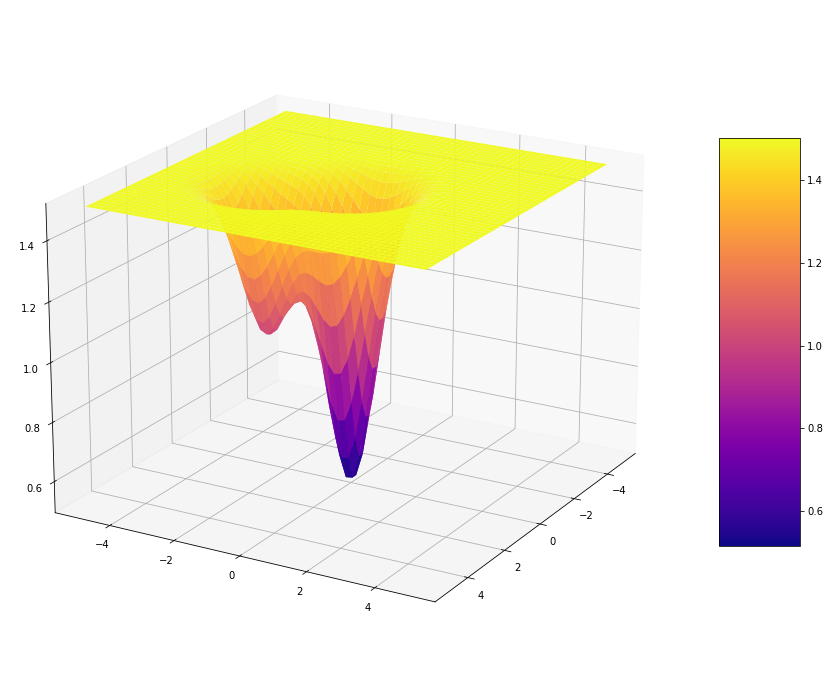

In [88]:
max_x = 5
func = f2

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
X = np.linspace(-max_x, max_x, 50)
Y = np.linspace(-max_x, max_x, 50)
X, Y = np.meshgrid(X, Y)
Z = func([X, Y])
surf = ax.plot_surface(X, Y, Z, cmap='plasma')
ax.view_init(20, 30)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

<ipython-input-86-e1d85d9de099>:12: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  optimum = np.array([x, function(x)])


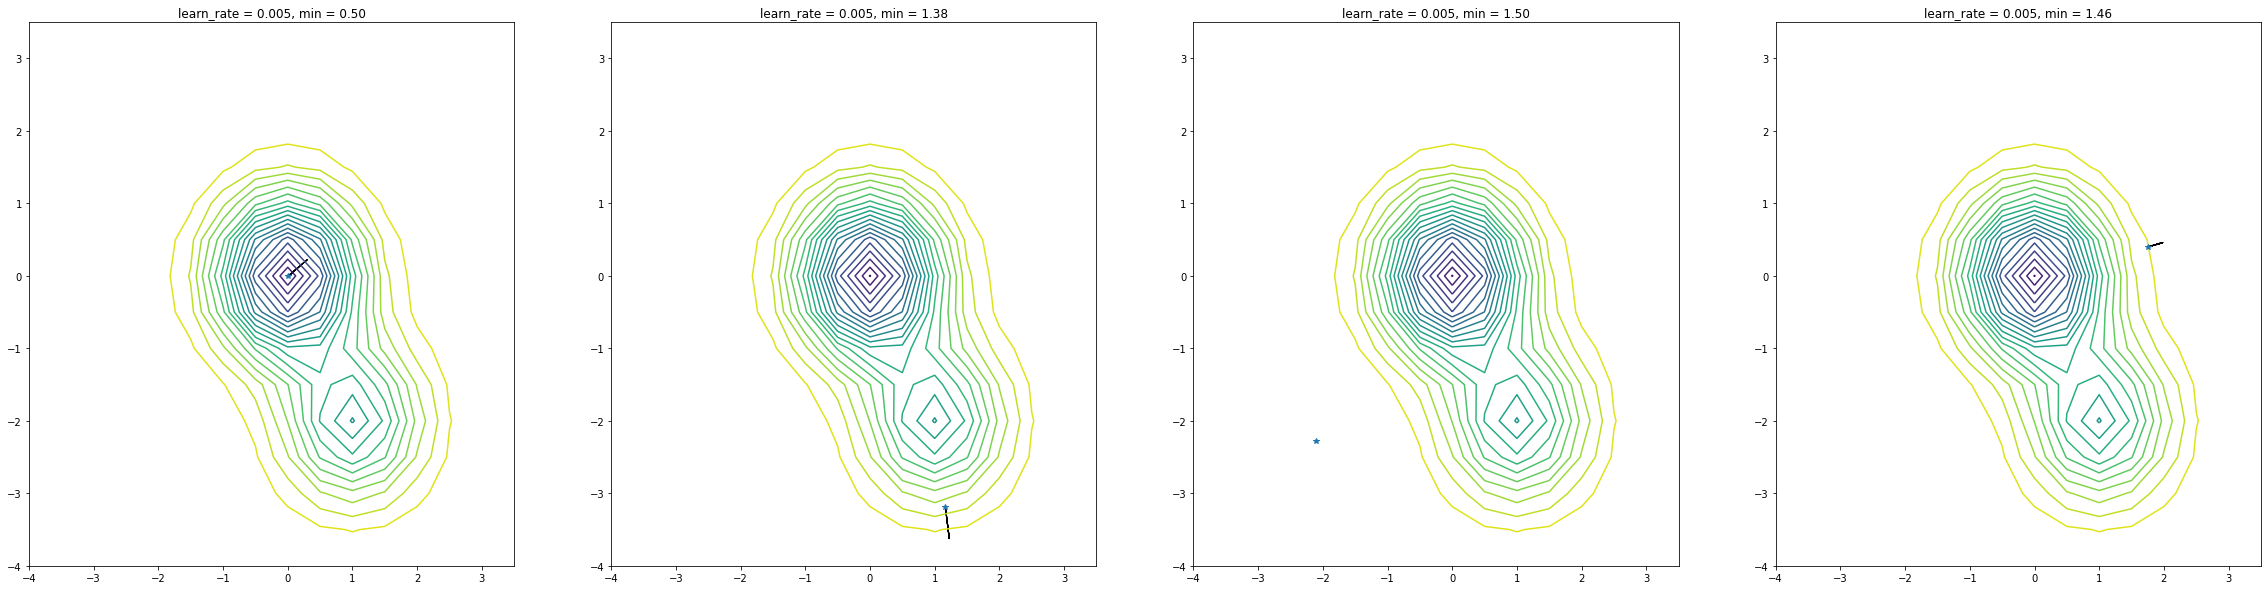

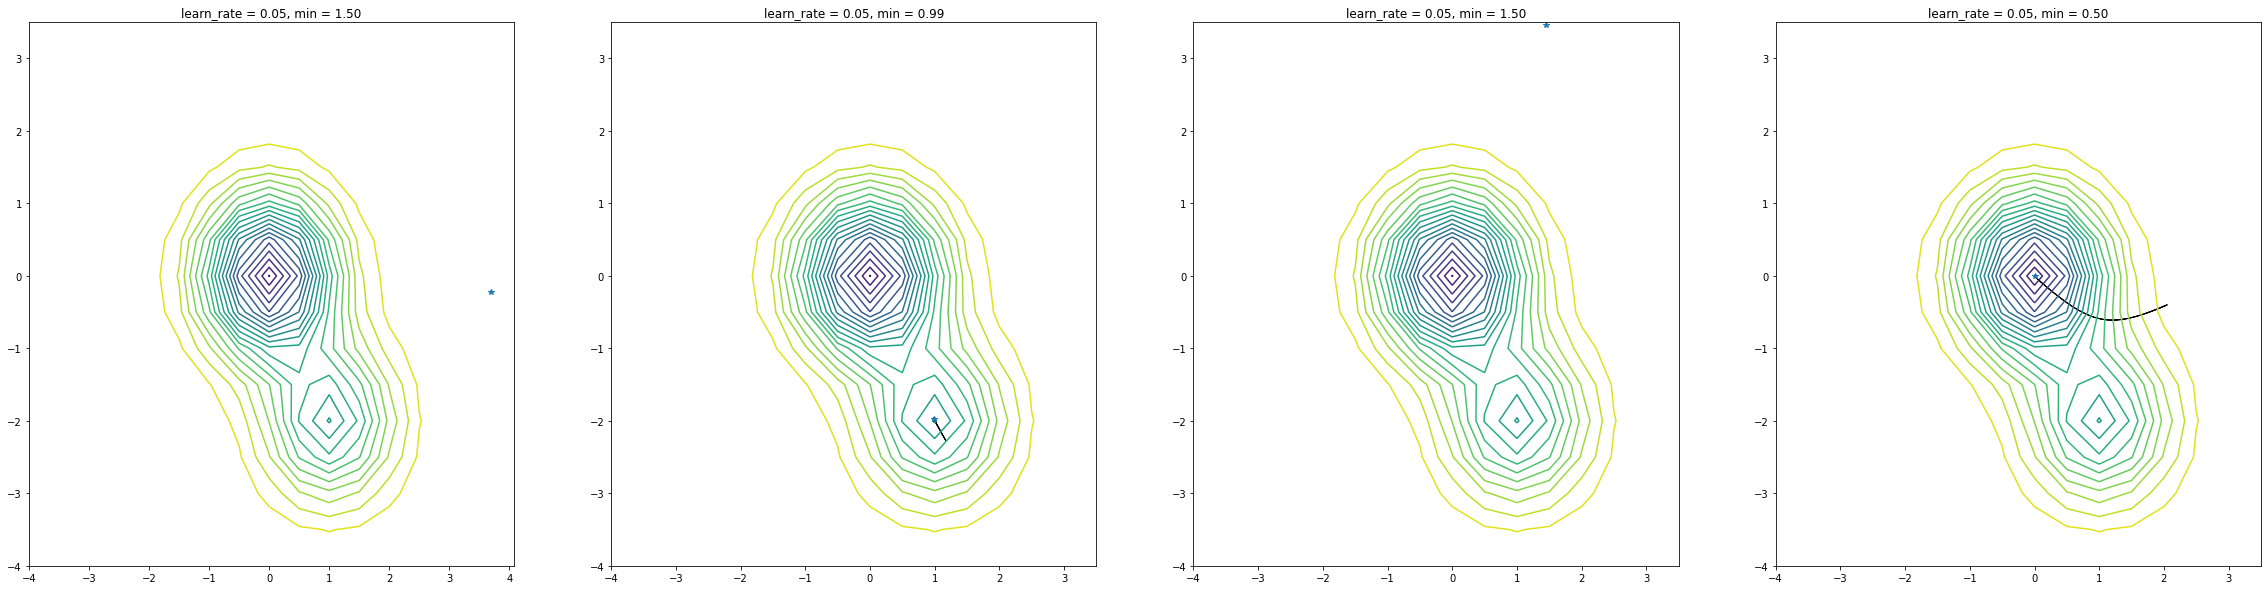

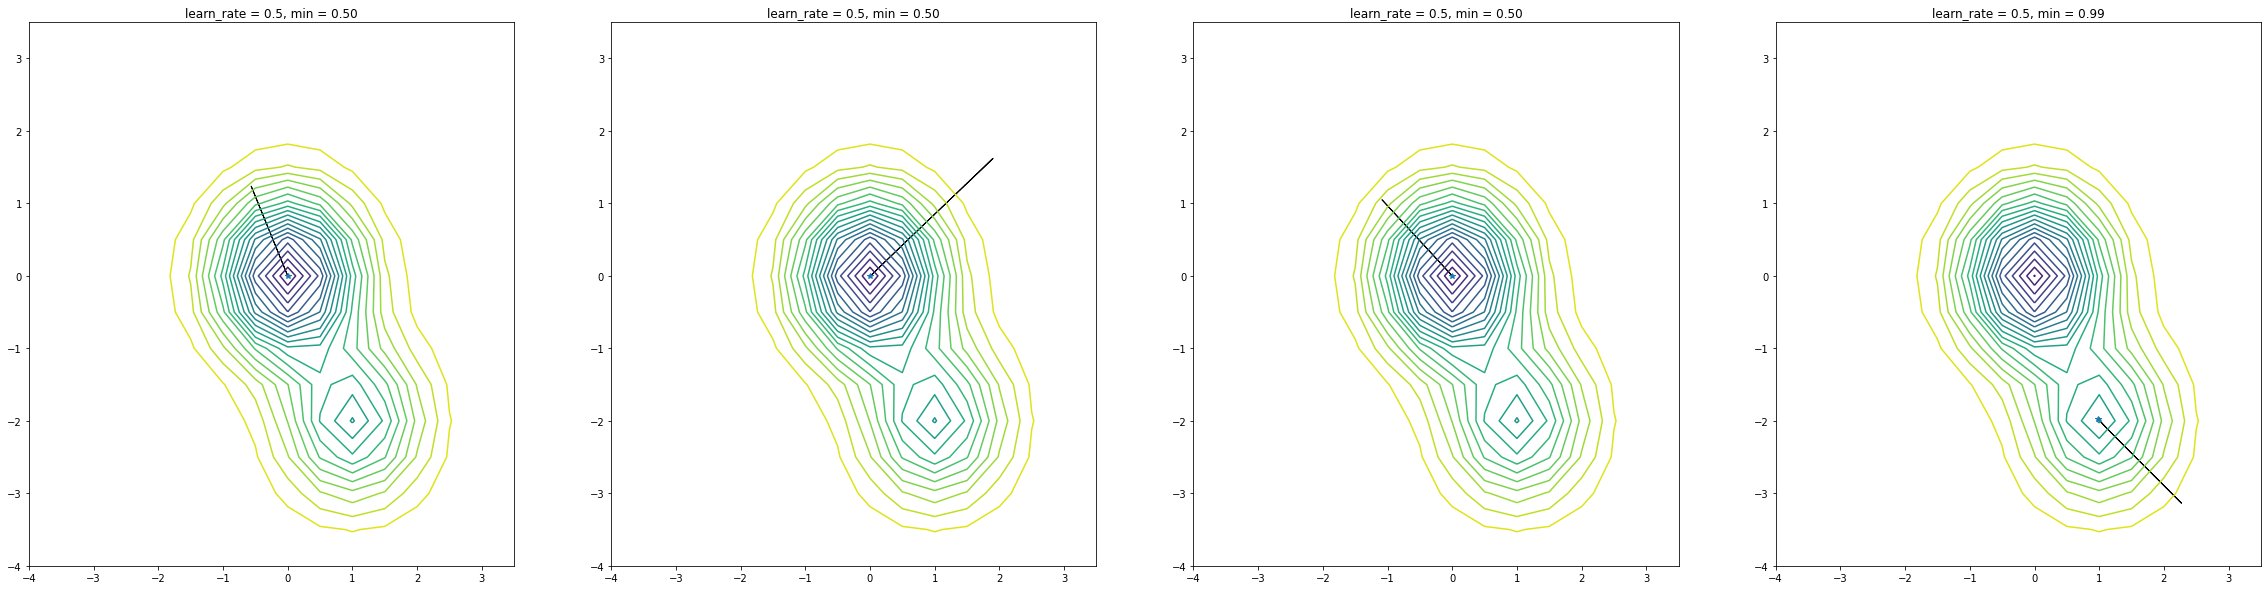

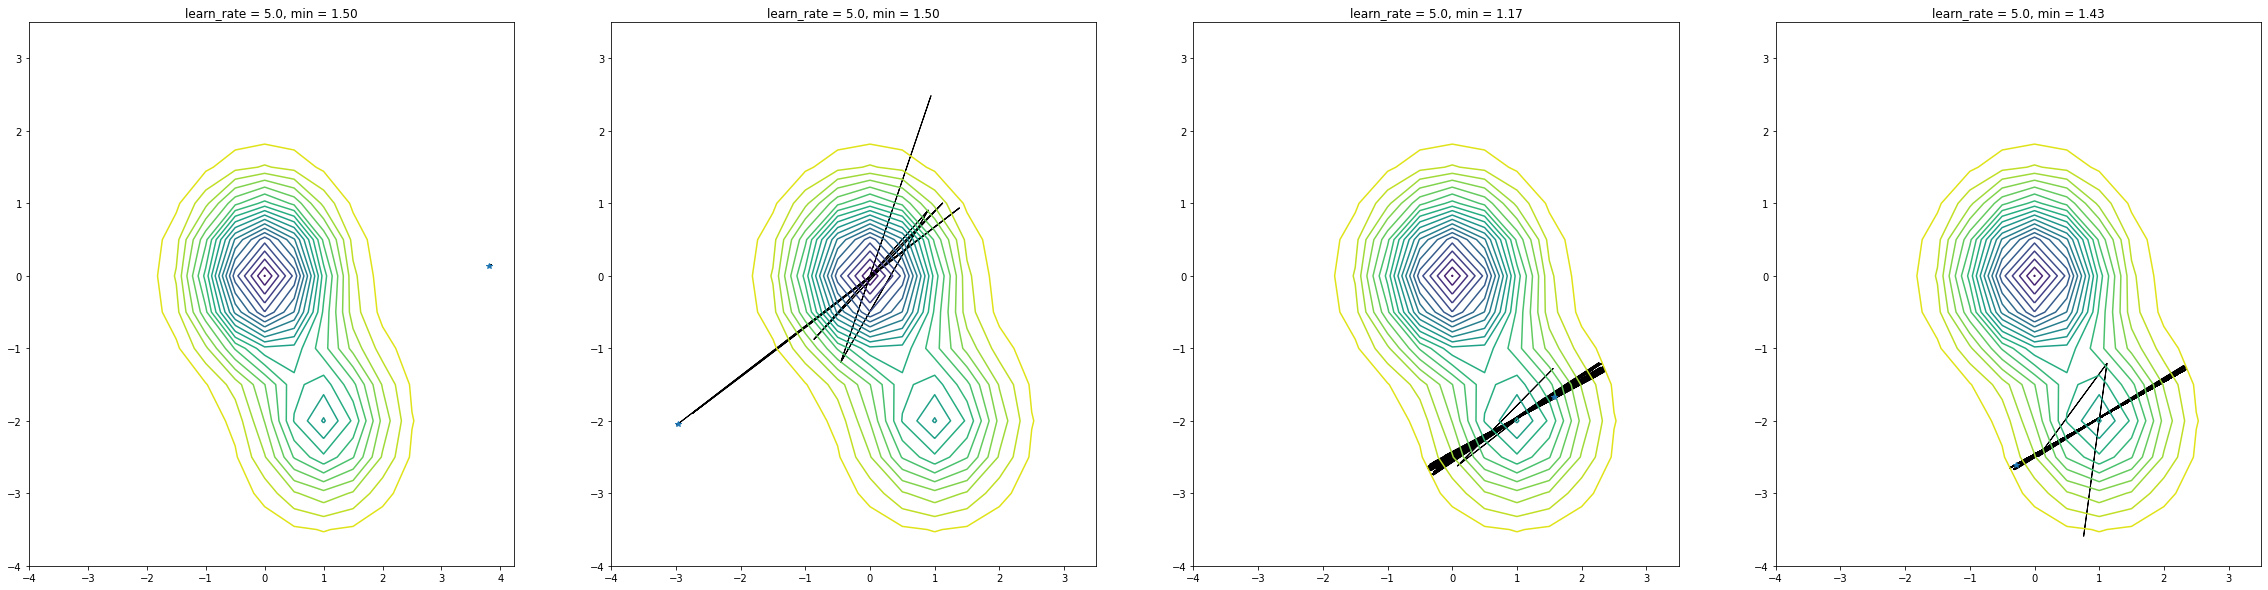

In [89]:
learn_rates = np.array([0.005, 0.05, 0.5, 5])
max_x = 4
max_iter = 500
func = f2

for j in range(len(learn_rates)):
    plt.figure(figsize=(40, 10))
    for i in range(4):
        plt.subplot(1, 4, i+1)
        x = np.arange(-max_x, max_x, 0.5)
        y = np.arange(-max_x, max_x, 0.5)
        X, Y = np.meshgrid(x, y)
        Z = np.empty(X.shape)
        for k in range(X.shape[0]):
            for l in range(X.shape[1]):
                Z[k, l] = func(np.array([X[k, l], Y[k, l]]))

        plt.contour(X, Y, Z, 20)
        minimum, steps = gradient_descent(func, 2, max_x, max_iter, learn_rates[j])
        plt.title(f"learn_rate = {learn_rates[j]}, min = {minimum[1]:.2f}")
        plt.plot(minimum[0][0], minimum[0][1], '*')
        for m in range(len(steps[:-1])):
             plt.arrow(steps[m][0], steps[m][1], steps[m+1][0] - steps[m][0], steps[m+1][1] - steps[m][1], fc='k', ec='k')
    plt.show()

# Wnioski i obserwacje

Funkcja F2 posiada dwa minima lokalne, z czego jedno jest globalnym. Bardzo istiontym elementem, tego czy i do którego minimum trafi gradient jest wybór punktu startowego. Jakoż był on w tym wypadku losowy, zdażało się, że funkcja trafiała do jednego, drugiego bądź do żadnego minimum, gdy punkt początkowy był zbyt daleko (płaskie nachylenie).

Podobnie jak dla funkcji jednowymiarowej możemy zaobserwować zjawiska, w których punkt nie dociera do minimum ze wględu na zbyt małe Beta (patrz learn_rate=0.005), tam gdzie parametr ten ma w miarę optymalną wartość (patrz learn_rate=0.05) oraz zachowanie algorytmu gradientu dla zbyt dużych Beta (patrz learn_rate=5), gdzie ponownie obserwujemy przeskakiwanie nad minimum lokalnym. Jednak nadal najważniejszym czynnikiem wpływającym na działanie pozostaje odlegość punktu początkowego od potencjalnego minimum.

W trakcie dobierania parametrów oraz dziedziny funkcji f2 zaobserowałem, ze nie warto analizować obszaru poza [-2,-2] <= [x,y] <= [2,2], ponieważ f2 jest poza tym obszarem praktycznie płaska i funkcja gradientu zwracała wartości nieskończenie małe, jakoż nachylenie było efektywnie zerowe.